<h1>Deaths Caused by Risk Factors (1990-2017)</h1>

Risk factors data source: https://www.kaggle.com/varpit94/worldwide-deaths-by-risk-factors
<br>
Countries' populations data source: https://data.worldbank.org/indicator/SP.POP.TOTL
<br>
<br>
The dataset is comprised of the total annual deaths in 231 entities and countries that are caused by risks factors from the years 1990-2017. The Kaggle user downloaded the data from the WHO website. One last note is that the death counts are in decimals because they are actually estimates made by WHO.
<br>
<br>
Risk factors include: Unsafe water source, unsafe sanitation, no access to handwashing facility ,household air pollution from solid fuels, non-exclusive breastfeeding, discontinued breastfeeding, child wasting', child stunting, low birth weight for gestation, secondhand smoke, alcohol use, drug use, diet low in fruits, diet low in vegetables, unsafe sex, low physical activity, high fasting plasma glucose, high body-mass index, high systolic blood pressure, smoking, iron deficiency, vitamin A deficiency , low bone mineral density, air pollution, outdoor air pollution, diet high in sodium, diet low in whole grains, and diet low in nuts and seeds.

In [1]:
# Import some libraries (numpy might not be used)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# load in the datasets
data = pd.read_csv('number-of-deaths-by-risk-factor.csv')
pop = pd.read_csv('CountryPop.csv', header=2)

In [3]:
# First 5 of rows of the datasets
data.head()

,Entity,Year,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,Child stunting,...,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
0,Afghanistan,1990,7554.049543,5887.747628,5412.314513,22388.49723,3221.138842,156.097553,22778.84925,10408.43885,...,28183.98335,6393.667372,726.431294,9344.131952,374.844056,26598.00673,4383.83,2737.197934,11381.37735,7299.867330
1,Afghanistan,1991,7359.676749,5732.770160,5287.891103,22128.75821,3150.559597,151.539851,22292.69111,10271.97643,...,28435.39751,6429.253320,739.245799,9330.182378,379.854237,26379.53222,4426.36,2741.184956,11487.83239,7386.764303
2,Afghanistan,1992,7650.437822,5954.804987,5506.657363,22873.76879,3331.349048,156.609194,23102.19794,10618.87978,...,29173.61120,6561.054957,873.485341,9769.844533,388.130434,27263.12791,4568.91,2798.560245,11866.23557,7640.628526
3,Afghanistan,1993,10270.731380,7986.736613,7104.620351,25599.75628,4477.006100,206.834451,27902.66996,12260.09384,...,30074.76091,6731.972560,1040.047422,11433.769490,405.577931,30495.56150,5080.29,2853.301679,12335.96168,7968.311853
4,Afghanistan,1994,11409.177110,8863.010065,8051.515953,28013.16720,5102.622054,233.930571,32929.00593,14197.94796,...,30809.49117,6889.328118,1101.764645,12936.955860,415.349195,33323.16140,5499.23,2880.025765,12672.95019,8244.368430


In [4]:
pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN


<h3>Data Cleaning & Pre-processing</h3>

In [8]:
# Drop any duplicate values
data.drop_duplicates(inplace=True)
pop.drop_duplicates(inplace=True)

In [9]:
# Checking for missing values and data types of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 0 to 6467
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    6468 non-null   object 
 1   Year                                      6468 non-null   int64  
 2   Unsafe water source                       6468 non-null   float64
 3   Unsafe sanitation                         6468 non-null   float64
 4   No access to handwashing facility         6468 non-null   float64
 5   Household air pollution from solid fuels  6468 non-null   float64
 6   Non-exclusive breastfeeding               6468 non-null   float64
 7   Discontinued breastfeeding                6468 non-null   float64
 8   Child wasting                             6468 non-null   float64
 9   Child stunting                            6468 non-null   float64
 10  Low birth weight for gestation      

The High total cholesterol column has a lot of missing values, so the whole column can be dropped. Outdoor air poillution has one missing values, which can also be dropped.

In [10]:
# Drop the column with a lot of missing values and the single row with a missing value
data.drop('High total cholesterol', axis=1, inplace=True)
data.dropna(axis=0,inplace=True)

In [11]:
# Drop useless columns from the pop table
pop.drop(['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 65'], axis=1, inplace=True)

In [12]:
# Output of unique entries in the Country Name column
pop['Country Name'].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Alge

Looks like the pop dataset has an entry for "World". I want to make the pop dataset only contain the world population of years 1990-2017.

In [13]:
# Create a copy of the pop table 
wpop = pop.copy()
# Select the row with the "World" value in Country Name column
wpop = wpop.loc[wpop['Country Name']=='World']
# First 5 rows of the wpop table
wpop.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
259,World,3.032156e+09,3.071596e+09,3.124561e+09,3.189656e+09,3.255146e+09,3.322047e+09,3.392098e+09,3.461620e+09,3.532783e+09,...,7.002881e+09,7.085790e+09,7.169675e+09,7.254293e+09,7.339077e+09,7.424485e+09,7.509410e+09,7.592476e+09,7.673345e+09,7.752841e+09


In [14]:
# Make the row into a column 
wpop = wpop.transpose()
wpop.head()

,259
Country Name,World
1960,3032156070.0
1961,3071596055.0
1962,3124561005.0
1963,3189655687.0


Transposing the table made the years into an index of the table, which needs to converted into a column. The first row is also unneeded.

In [15]:
# Remove the first row
wpop.drop('Country Name', inplace=True)

# Make the index into a column &
wpop.reset_index(level=0, inplace=True)
# Check changes made
wpop.head()

,index,259
0,1960,3032156070.0
1,1961,3071596055.0
2,1962,3124561005.0
3,1963,3189655687.0
4,1964,3255145692.0


In [16]:
# Change column names
wpop.rename(columns={'index':'Year',259:'World Population'},inplace=True)
# Check for changes made & for any other change that need to be made
wpop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              61 non-null     object
 1   World Population  61 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [17]:
# Change columns to int 
wpop = wpop.astype('int64')

Now, I also want our main dataset to only contain info pertaining to the world.

In [18]:
# Create a copy of the data table 
dataw = data.copy()
# Select rows that has the "World" value in the Entity column
dataw = dataw.loc[dataw['Entity']=='World']
dataw.head()

,Entity,Year,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,Child stunting,...,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
6356,World,1990,2111659.077,1638021.199,1239519.421,2708904.820,514102.3516,34850.39553,3365308.624,1.001277e+06,...,6884458.978,5681577.793,125242.9483,986994.9962,152126.9382,4693071.312,2143845.13,2222475.141,2151022.727,1409270.218
6357,World,1991,2095066.505,1622958.940,1230318.626,2677805.722,502180.0259,33853.61620,3296648.253,9.758027e+05,...,6988580.174,5769043.287,123752.2323,971721.1216,155500.3615,4720094.144,2204256.45,2252610.545,2185116.265,1429384.206
6358,World,1992,2053362.286,1588275.164,1209423.879,2648544.390,481844.5346,32221.54775,3203517.655,9.463600e+05,...,7115388.804,5869243.876,124721.5959,950555.6553,159199.6344,4745836.577,2260754.70,2292060.318,2234234.521,1458515.367
6359,World,1993,2013224.699,1553936.146,1188248.169,2604092.494,462904.1330,30647.96698,3115719.489,9.189466e+05,...,7329202.966,6023154.990,121526.6645,931671.8768,163634.9343,4768144.772,2327997.81,2315164.710,2312937.055,1508398.818
6360,World,1994,1973406.044,1519967.074,1167209.347,2563321.579,445422.5075,29178.11928,3039123.021,8.940853e+05,...,7469316.400,6115916.982,119260.7228,914227.2521,167304.1564,4773589.913,2374627.04,2319321.178,2366171.187,1538154.126


In [19]:
# Remove Entity Column
dataw.drop('Entity', axis=1, inplace=True)

In [20]:
# Combine the two datasets into one
datapop = pd.merge(dataw, wpop, how='inner', on='Year')
datapop.head()

,Year,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,Child stunting,Low birth weight for gestation,...,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds,World Population
0,1990,2111659.077,1638021.199,1239519.421,2708904.820,514102.3516,34850.39553,3365308.624,1.001277e+06,1976612.538,...,5681577.793,125242.9483,986994.9962,152126.9382,4693071.312,2143845.13,2222475.141,2151022.727,1409270.218,5280046096
1,1991,2095066.505,1622958.940,1230318.626,2677805.722,502180.0259,33853.61620,3296648.253,9.758027e+05,1960013.069,...,5769043.287,123752.2323,971721.1216,155500.3615,4720094.144,2204256.45,2252610.545,2185116.265,1429384.206,5368139468
2,1992,2053362.286,1588275.164,1209423.879,2648544.390,481844.5346,32221.54775,3203517.655,9.463600e+05,1941448.918,...,5869243.876,124721.5959,950555.6553,159199.6344,4745836.577,2260754.70,2292060.318,2234234.521,1458515.367,5452576447
3,1993,2013224.699,1553936.146,1188248.169,2604092.494,462904.1330,30647.96698,3115719.489,9.189466e+05,1916294.891,...,6023154.990,121526.6645,931671.8768,163634.9343,4768144.772,2327997.81,2315164.710,2312937.055,1508398.818,5537885552
4,1994,1973406.044,1519967.074,1167209.347,2563321.579,445422.5075,29178.11928,3039123.021,8.940853e+05,1881590.107,...,6115916.982,119260.7228,914227.2521,167304.1564,4773589.913,2374627.04,2319321.178,2366171.187,1538154.126,5622085788


<h3>Data Visualization</h3>

Text(0, 0.5, "Total Annual Deaths (0000000's)")

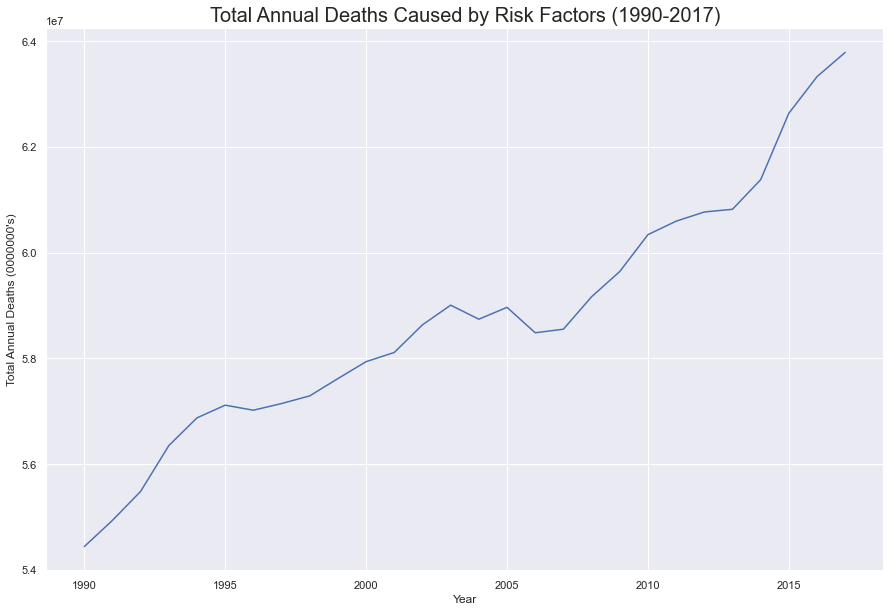

In [21]:
# Create a new column of the total deaths per year 
datapop['Total Deaths'] = datapop[datapop.columns.difference(['Year', 'World Population'])].sum(axis=1)

# Set plot size and theme
plt.figure(figsize=(15, 10))
sn.set_theme(style="darkgrid")
# Line plot of total annual deaths
sn.lineplot(x='Year', y='Total Deaths', data=datapop)
# Add title
plt.title('Total Annual Deaths Caused by Risk Factors (1990-2017)', fontsize=20)
# Change name of y-axis
plt.ylabel('Total Annual Deaths (0000000\'s)')

There is an increasing trend in the total annual deaths, but that may just be due to an ever-growing world population, so I need to calculate the death rate per 1000 people to get a more accurate representation.

Text(0, 0.5, 'Deaths per 1000')

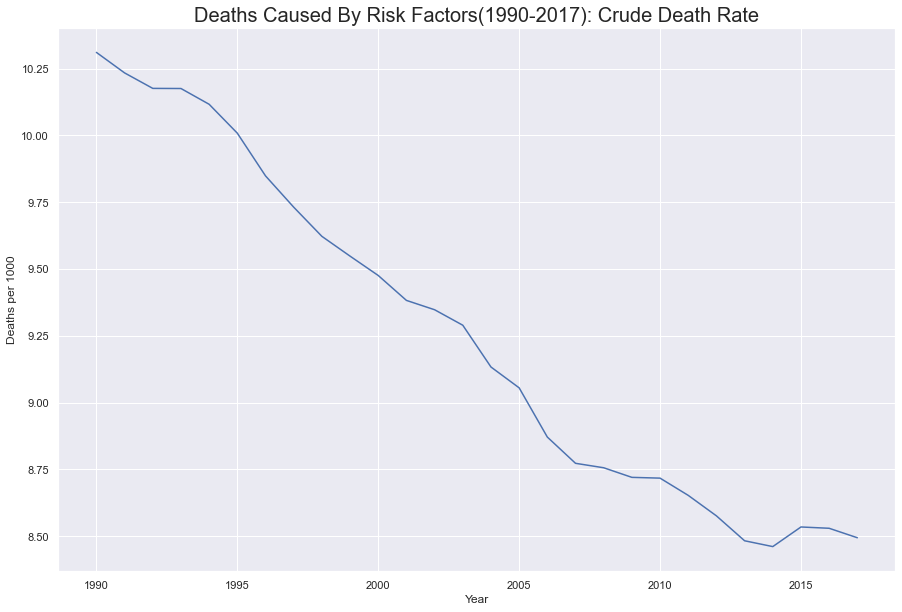

In [22]:
# Create a column that calculates the death rate per 1000 people
datapop['Death Rate'] = (datapop['Total Deaths']/datapop['World Population'])*1000

# Set plot size
plt.figure(figsize=(15, 10))
# Line plot of the death rate per 1000 people   
sn.lineplot(x='Year', y='Death Rate', data=datapop)
# Add title
plt.title('Deaths Caused By Risk Factors(1990-2017): Crude Death Rate', fontsize=20)
# Change name of y-axis
plt.ylabel('Deaths per 1000')

In [23]:
# Create a table of total deaths caused by each risk factor 
risk_totals = datapop[datapop.columns.difference(['Year', 'Total Deaths', 'World Population', 'Death Rate'])].sum(axis=0)
datapop2 = pd.DataFrame(risk_totals, columns=['Total Deaths per Risk Factor'])
datapop2['Risk Factors'] = datapop2.index
datapop2.reset_index(drop=True, inplace=True)
# Rearrange order of columns
colnames = ['Risk Factors', 'Total Deaths per Risk Factor']
datapop2 = datapop2.reindex(columns=colnames)

Text(0.5, 0, "Total Deaths (00000000's)")

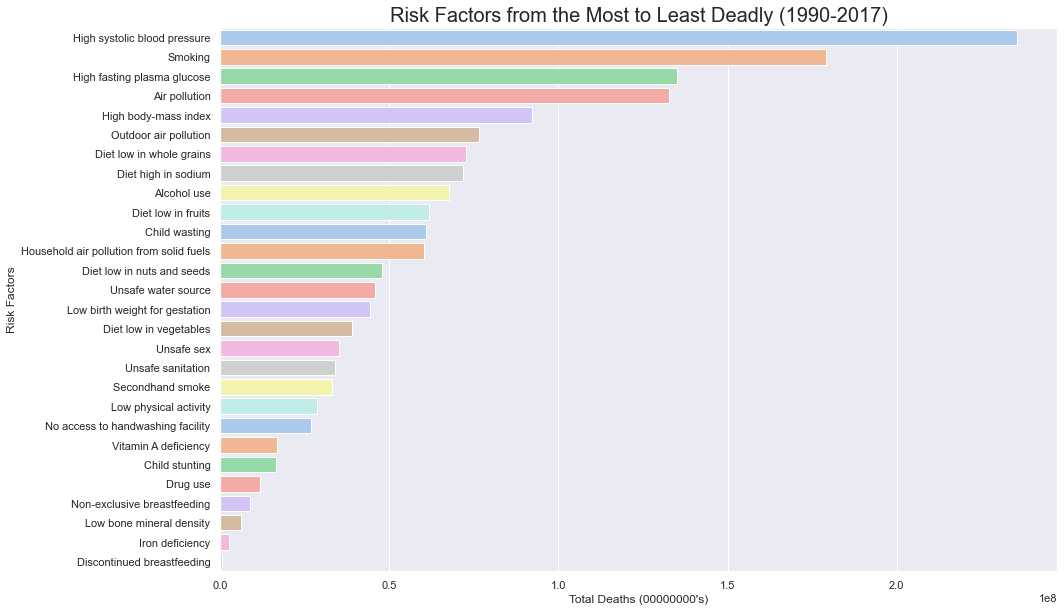

In [42]:
# Create a bar graph of the death count of each risk factor
temp = datapop2.sort_values(by='Total Deaths per Risk Factor', ascending=False)
plt.figure(figsize=(15, 10))
sn.barplot(x='Total Deaths per Risk Factor', y='Risk Factors', data=temp, palette='pastel')
plt.title('Risk Factors from the Most to Least Deadly (1990-2017)', fontsize=20)
plt.xlabel('Total Deaths (00000000\'s)')

The deadliest risk factor is high systolic blood pressure, and the least deadly is discontinued breastfeeding.

Text(0, 0.5, "Deaths (000000's)")

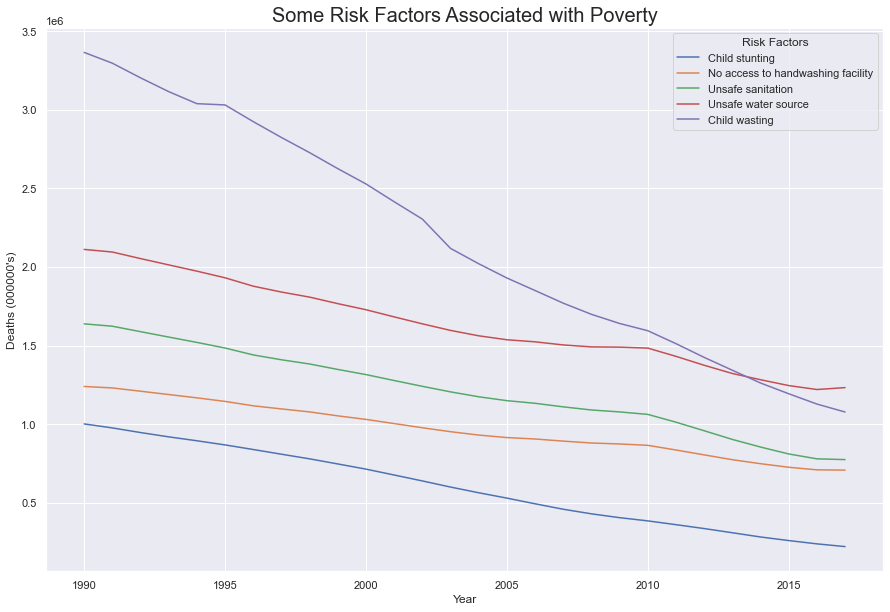

In [44]:
# Create a line graph to see trend of 5 risk factors associated with poverty
data5 = datapop[['Year', 'Child stunting', 'No access to handwashing facility', 'Unsafe sanitation', 'Unsafe water source', 'Child wasting']]
data5m = pd.melt(data5, 'Year', var_name='Risk Factors', 
              value_name='Deaths')
plt.figure(figsize=(15, 10))
sn.lineplot(x='Year', y='Deaths', hue='Risk Factors', data=data5m)
plt.title('Some Risk Factors Associated with Poverty', fontsize=20)
plt.ylabel('Deaths (000000\'s)')

A decreasing trend may indicate that as years pass, people's access to good nutrition and sanitation is gradually improving.